# Technical : What were the Top 10 Grossing Studios, per year, over the past Decade

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cleaner
import studio_formulas
%reload_ext autoreload
%autoreload 2

### Preform Exploratory Data Analysis: bom_df dataset 


In the following, steps we explored the bom_df dataset utilize the .shape, .items, .doctype methods 

In [138]:
bom_df = pd.read_csv('data/bom.movie_gross.csv') #import the bom_df dataset
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [139]:
bom_df.shape #here we see that our dataframe is 3387 rows by 5 columns

(3387, 5)

In [140]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The .info() method allows us to see how much cleaning we need to do of our indices. It looks like the foreign_gross may present some issues with missing data. This would be a good column to drop.

In [141]:
bom_df.index

RangeIndex(start=0, stop=3387, step=1)

In [205]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

### Define our Question: how do you begin to organize by year, studio, and domestic gross?

In [4]:
studio_gross = bom_df[['studio','domestic_gross','year']]
studio_gross.head()

,studio,domestic_gross,year
0,BV,415000000.0,2010
1,BV,334200000.0,2010
2,WB,296000000.0,2010
3,WB,292600000.0,2010
4,P/DW,238700000.0,2010


Above is our new dataframe studio_gross containing the essentail columns needed to answer our question

We can further approach this question with the groupby function. This is a first go, but it appears that the groupby function will be a critical commponent to achieving our answer. The output below breaks out each year 2010 - 2018 and the number of studios, but it's missing the domestic gross


In [5]:
studio_gross.groupby(['year', 'studio', 'domestic_gross']).groups
studio_gross.groupby('year').groups

{2010: Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
             ...
             318, 319, 320, 321, 322, 323, 324, 325, 326, 327],
            dtype='int64', length=328),
 2011: Int64Index([328, 329, 330, 331, 332, 333, 334, 335, 336, 337,
             ...
             717, 718, 719, 720, 721, 722, 723, 724, 725, 726],
            dtype='int64', length=399),
 2012: Int64Index([ 727,  728,  729,  730,  731,  732,  733,  734,  735,  736,
             ...
             1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126],
            dtype='int64', length=400),
 2013: Int64Index([1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136,
             ...
             1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476],
            dtype='int64', length=350),
 2014: Int64Index([1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486,
             ...
             1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871],
            dtype='int64', len

### continuing to figure out how to organize the data...

this is a step in the right direction, the groupby function was able to group the dataframe by year and studio. 
the .groups method then was able to displays this data 
to improve this data, we would like to add in domestic_gross data

Perhaps we need a list of all of the studios we're working with. This studio list may come in handy in order to preform a future sort

In [6]:
studio_list = bom_df['studio'].unique()

By utilizing the .unique method, the code above gives us a list of studios 

In [7]:
print(studio_list)

['BV' 'WB' 'P/DW' 'Sum.' 'Par.' 'Uni.' 'Fox' 'Wein.' 'Sony' 'FoxS' 'SGem'
 'WB (NL)' 'LGF' 'MBox' 'CL' 'W/Dim.' 'CBS' 'Focus' 'MGM' 'Over.' 'Mira.'
 'IFC' 'CJ' 'NM' 'SPC' 'ParV' 'Gold.' 'JS' 'RAtt.' 'Magn.' 'Free' '3D'
 'UTV' 'Rela.' 'Zeit.' 'Anch.' 'PDA' 'Lorb.' 'App.' 'Drft.' 'Osci.' 'IW'
 'Rog.' nan 'Eros' 'Relbig.' 'Viv.' 'Hann.' 'Strand' 'NGE' 'Scre.' 'Kino'
 'Abr.' 'CZ' 'ATO' 'First' 'GK' 'FInd.' 'NFC' 'TFC' 'Pala.' 'Imag.' 'NAV'
 'Arth.' 'CLS' 'Mont.' 'Olive' 'CGld' 'FOAK' 'IVP' 'Yash' 'ICir' 'FM'
 'Vita.' 'WOW' 'Truly' 'Indic.' 'FD' 'Vari.' 'TriS' 'ORF' 'IM' 'Elev.'
 'Cohen' 'NeoC' 'Jan.' 'MNE' 'Trib.' 'Rocket' 'OMNI/FSR' 'KKM' 'Argo.'
 'SMod' 'Libre' 'FRun' 'WHE' 'P4' 'KC' 'SD' 'AM' 'MPFT' 'Icar.' 'AGF'
 'A23' 'Da.' 'NYer' 'Rialto' 'DF' 'KL' 'ALP' 'LG/S' 'WGUSA' 'MPI' 'RTWC'
 'FIP' 'RF' 'ArcEnt' 'PalUni' 'EpicPics' 'EOne' 'LD' 'AF' 'TFA' 'Myr.'
 'BM&DH' 'SEG' 'PalT' 'Outs' 'OutF' 'BSM' 'WAMCR' 'PM&E' 'A24' 'Cdgm.'
 'Distrib.' 'Imax' 'PH' 'HTR' 'ELS' 'PI' 'E1' 'TVC' 'FEF' 'EXCL

We're moving in the right direction. Below is an even better appraoch at answering our question. We've utilized the groupby., value_counts, and reset_index method in order to count the number of movies a studio produced by year. This is stil missing the domestic gross component. 

In [4]:
bom_df.groupby('year').studio.value_counts().reset_index(name='counts')


,year,studio,counts
0,2010,IFC,22
1,2010,SPC,19
2,2010,WB,19
3,2010,Fox,17
4,2010,Magn.,16
...,...,...,...
737,2018,Swen,1
738,2018,Synergetic,1
739,2018,Trafalgar,1
740,2018,Vita.,1


Here's another version of the groupby function and value counts 

In [231]:
bom_df.groupby('year').studio.value_counts()

year  studio    
2010  IFC           22
      SPC           19
      WB            19
      Fox           17
      Magn.         16
                    ..
2018  Swen           1
      Synergetic     1
      Trafalgar      1
      Vita.          1
      Yash           1
Name: studio, Length: 742, dtype: int64

This is great progress. However, how do we incorporate domestic gross? 

In [9]:
bom_df.groupby(['year','studio'])['domestic_gross']

In [10]:
bom_dfdf = bom_df.groupby(['studio','domestic_gross'])


In [5]:
bom_df2018 = bom_df.loc[bom_df['year'] == 2018 ]
bom_df2018


,title,studio,domestic_gross,foreign_gross,year
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3080,Black Panther,BV,700100000.0,646900000,2018
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000,2018
3082,Incredibles 2,BV,608600000.0,634200000,2018
3083,Aquaman,WB,335100000.0,812700000,2018
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [250]:
bom_df2018_WB = bom_df2018.loc[bom_df2018['studio'] == 'WB']

In [293]:
bom_df2018_WB['domestic_gross'].sum()

1729100000.0

In [251]:
bom_df2018_WB.head()


,title,studio,domestic_gross,foreign_gross,year
3083,Aquaman,WB,335100000.0,812700000,2018
3088,Fantastic Beasts: The Crimes of Grindelwald,WB,159600000.0,494100000,2018
3090,Ready Player One,WB,137700000.0,445200000,2018
3092,Detective Chinatown 2,WB,2000000.0,542100000,2018
3093,The Meg,WB,145400000.0,384800000,2018


I'm able to make a dataframe that is filtered by year and by a single studio. Now, I would like to iterate this across all studios in 2018 

In [8]:
#List of all studios active in 2018 

bom_df.dropna(subset = ['foreign_gross'], inplace = True)

In [9]:
bom_df2018 = bom_df.loc[bom_df['year'] == 2018]
bom_df2018['studio'].unique()
studios_2018 = bom_df2018['studio'].unique()

In [291]:

#bom_df2018['total_gross'] = bom_df2018['domestic_gross'] + bom_df2018['foreign_gross']

In [10]:
studios_2018 #here is my list of studios for 2018 

array(['BV', 'Uni.', 'WB', 'Fox', 'Sony', 'Par.', 'WGUSA', 'WB (NL)',
       'LGF', 'MGM', 'Studio 8', 'FoxS', 'STX', 'Focus', 'PNT', 'LG/S',
       'A24', 'Annapurna', 'SGem', 'FIP', 'VPD', 'Global Road', 'CL',
       'IFC', 'Affirm', 'Trafalgar', 'SPC', 'ENTMP', 'Amazon', 'BH Tilt',
       'BST', 'Magn.', 'MBox', 'Greenwich', 'CJ', 'GK', 'Spanglish',
       'Distrib.', 'Blue Fox', 'Scre.', 'Yash', 'Aviron', 'Cohen', 'VE',
       'Grindstone', 'Darin Southa', 'FM'], dtype=object)

Below is the best attempt yet at iterating through all of the studios for 2018. It's a bit bulky, especially in the directory portion (I inserted 3 lines of code for the value part of the key:value pair) but it worked!

In [70]:
#Create a list of studios for 2018 

bom_df2018 = bom_df.loc[bom_df['year'] == 2018]
bom_df2018['studio'].unique()
studios_2018 = bom_df2018['studio'].unique()

studios_2018 #list of  studios in 2018 

#Finding an example studio (WB) and what the studio grossed in year 2018:
bom_df2018 = bom_df.loc[bom_df['year'] == 2018 ]
bom_df2018_WB = bom_df2018.loc[bom_df2018['studio'] == 'WB']
bom_df2018_WB['domestic_gross'].sum()


#Now make a function to preform this on every studio in studios_2018 list 
#I would like a dictionary of studio and its gross for 2018 

studios_2018 
studio_gross_dic = {} #this dictionary contains studio and 2018 domestic gross 

#key = studio name
#value = domestic_gross

for studio in studios_2018: 
    
    
    bom_df2018 = bom_df.loc[bom_df['year'] == 2018 ]
    bom_df2018_WB = bom_df2018.loc[bom_df2018['studio'] == studio]
    bom_df2018_WB['domestic_gross'].sum()

    studio_gross_dic.update({studio : bom_df2018_WB['domestic_gross'].sum()
                             
                             })
                             
                            
print(studio_gross_dic)

{'BV': 3045600000.0, 'Uni.': 1789600000.0, 'WB': 1707900000.0, 'Fox': 840300000.0, 'Sony': 956690000.0, 'Par.': 699400000.0, 'WGUSA': 2538000.0, 'WB (NL)': 395500000.0, 'LGF': 202355400.0, 'MGM': 115700000.0, 'Studio 8': 59900000.0, 'FoxS': 66400000.0, 'STX': 261600000.0, 'Focus': 111900000.0, 'PNT': 50300000.0, 'LG/S': 77600000.0, 'A24': 44648000.0, 'Annapurna': 67300000.0, 'SGem': 92300000.0, 'FIP': 9200000.0, 'VPD': 12216000.0, 'Global Road': 34200000.0, 'CL': 70800.0, 'IFC': 9825000.0, 'Affirm': 17600000.0, 'Trafalgar': 4200000.0, 'SPC': 9600000.0, 'ENTMP': 17400000.0, 'Amazon': 15599999.0, 'BH Tilt': 20900000.0, 'BST': 18500000.0, 'Magn.': 1400.0, 'MBox': 258000.0, 'Greenwich': 1600000.0, 'CJ': 94500.0, 'GK': 35800.0, 'Spanglish': 2600000.0, 'Distrib.': 37100.0, 'Blue Fox': 91000.0, 'Scre.': 29500.0, 'Yash': 330000.0, 'Aviron': 1600000.0, 'Cohen': 200000.0, 'VE': 492300.0, 'Grindstone': 10000.0, 'Darin Southa': 93200.0, 'FM': 43200.0}


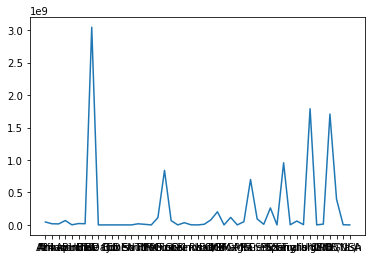

In [12]:
import matplotlib.pylab as plt

lists = sorted(studio_gross_dic.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

In [18]:
studio_gross = pd.DataFrame(list(studio_gross_dic.items()), columns=['studio','domestic_gross'])
top_10 = studio_gross.sort_values(by ='domestic_gross', ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Domestic Grossing Studios 2018')

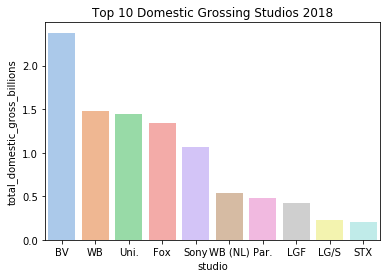

In [64]:
top_10['total_domestic_gross_billions'] = (top_10['domestic_gross']/1000000000)

sns.barplot(x="studio", y="total_domestic_gross_billions", palette= 'pastel', color= 'blue', data=top_10)
plt.title('Top 10 Domestic Grossing Studios 2018')

Now, do the same for 2016

In [71]:

bom_df2017 = bom_df.loc[bom_df['year'] == 2017]
bom_df2017['studio'].unique()
studios_2017 = bom_df2017['studio'].unique()

studios_2017 #list of  studios in 2017 

#Finding an example studio (WB) and what the studio grossed in year 2018:
bom_df2017 = bom_df.loc[bom_df['year'] == 2017 ]
bom_df2017_WB = bom_df2017.loc[bom_df2017['studio'] == 'WB']
bom_df2017_WB['domestic_gross'].sum()


#Now make a function to preform this on every studio in studios_2018 list 
#I would like a dictionary of studio and its gross for 2018 

studios_2017 
studio_gross_dic2017 = {} #this dictionary contains studio and 2018 domestic gross 

#key = studio name
#value = domestic_gross

for studio in studios_2017: 
    
    
    bom_df2017 = bom_df.loc[bom_df['year'] == 2017 ]
    bom_df2017_WB = bom_df2017.loc[bom_df2017['studio'] == studio]
    bom_df2017_WB['domestic_gross'].sum()

    studio_gross_dic2017.update({studio : bom_df2017_WB['domestic_gross'].sum()
                             
                             })
                             
                            
print(studio_gross_dic2017)


{'BV': 2378200000.0, 'Uni.': 1443500000.0, 'Sony': 1062636000.0, 'HC': 2700000.0, 'WB': 1479400000.0, 'WB (NL)': 532400000.0, 'Fox': 1345000000.0, 'Par.': 484699999.0, 'FUN': 5424000.0, 'SGem': 57200000.0, 'LGF': 422465000.0, 'WGUSA': 2081000.0, 'GrtIndia': 20200000.0, 'TriS': 135300000.0, 'STX': 206800000.0, 'FoxS': 154200000.0, 'LG/S': 224900000.0, 'CL': 865000.0, 'Focus': 179900000.0, nan: 0.0, 'Wein.': 44556000.0, 'Yash': 5600000.0, 'A24': 84100000.0, 'ORF': 59699999.0, 'PNT': 32100000.0, 'CJ': 1576000.0, 'Neon': 30000000.0, 'BST': 36400000.0, 'Good Deed': 6700000.0, 'SPC': 19791000.0, 'ParC': 5900.0, 'FIP': 6334000.0, 'Elev.': 1500000.0, 'PFR': 14700000.0, 'Amazon': 1400000.0, 'BBC': 81300.0, 'FR': 211000.0, 'RAtt.': 14824000.0, 'IFC': 1275700.0, 'W/Dim.': 700.0, 'BG': 6223000.0, 'Affirm': 5800000.0, 'Distrib.': 1000000.0, 'Annapurna': 2100000.0, 'FCW': 515000.0, 'Imax': 1500000.0, 'Magn.': 528000.0, 'MOM': 14800.0, 'Vita.': 360000.0}


In [69]:
studio_gross_2017 = pd.DataFrame(list(studio_gross_dic2017.items()), columns=['studio','domestic_gross'])
top_10_2017 = studio_gross_2017.sort_values(by ='domestic_gross', ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Domestic Grossing Studios 2017')

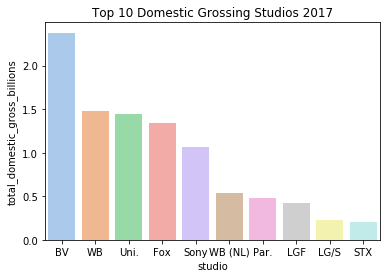

In [68]:

top_10_2017['total_domestic_gross_billions'] = (top_10_2017['domestic_gross']/1000000000)

sns.barplot(x="studio", y="total_domestic_gross_billions", palette= 'pastel', color= 'blue', data=top_10_2017)
plt.title('Top 10 Domestic Grossing Studios 2017')

In [154]:
df = bom_df

Below was some miscellaneous code accessing movie production 

# What were the most active studios in the past 5 years in terms of movie production?

How many active studios in 2018 

In [66]:
df_studios = bom_df.loc[bom_df['year'] == 2018]
len(bom_df2018['studio'].unique())

47

How many active studios in 2017

In [67]:
bom_df2017 = bom_df.loc[bom_df['year'] == 2017]
len(bom_df2017['studio'].unique())

49

How many active studios in 2016

In [129]:
bom_df2016 = bom_df.loc[bom_df['year'] == 2016]
len(bom_df2016['studio'].unique())

92

How many active studios in 2015


In [133]:
bom_df2015 = bom_df.loc[bom_df['year'] == 2015]
len(bom_df2015['studio'].unique())

94

How many active studios in 2014


In [136]:
bom_df2014 = bom_df.loc[bom_df['year'] == 2014]
len(bom_df2014['studio'].unique())

81

In [ ]:
studio_df = pd.DataFrame(bom_df2018.groupby('studio').sum())['']